#Neha Saindane - DATA SCIENCE AND BUSINESS ANALYTICS INTERN

**Task 1 :Prediction Using Supervised**

**Problem Statement : Predict the percentage of an student based on the no. of study hours**

**Import Libraries**

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")


In [3]:
#To read data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
print(data.shape)

(25, 2)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.isnull().sum() #looking for missing values

Hours     0
Scores    0
dtype: int64

**To check the correlation**

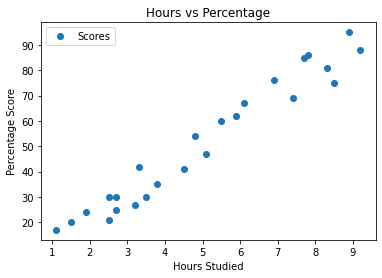

In [8]:
data.plot(x='Hours' , y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [21]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Linear Regression**

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [12]:
#splitting the dataset for training and testing of model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [13]:
#training the algorithm
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting train,test and predicted scores

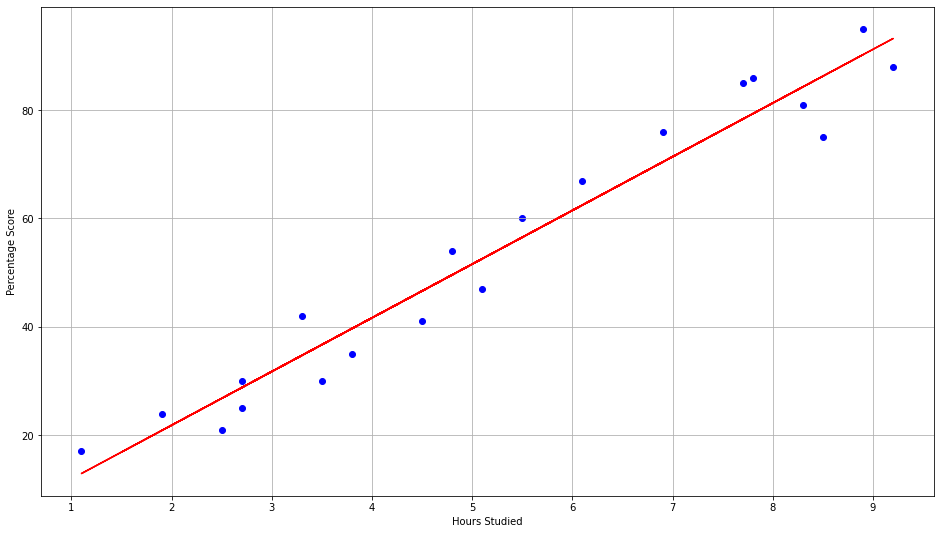

In [14]:
#Plotting for the training data
line = (model.coef_)*x + model.intercept_ #y=mx+c
plt.figure(figsize = (16,9))
plt.scatter(x_train, y_train,color='blue')
plt.plot(x, line, color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

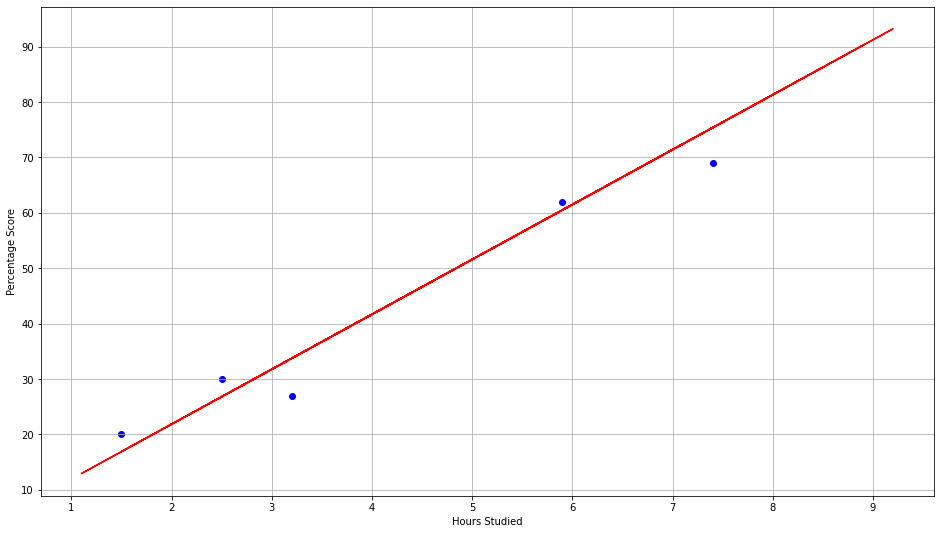

In [15]:
#Plotting for the testing data
plt.figure(figsize = (16,9))
plt.scatter(x_test, y_test,color='blue')
plt.plot(x,line, color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [16]:
#model to make predictions
y_pred = model.predict(x_test)
df= pd.DataFrame({'Actual Scores': y_test, 'Predicted Score':y_pred})
df

,Actual Scores,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [22]:
#Testing with own data
hours = 9.25
data_pred = model.predict([[hours]])
print("The predicted score if a student studies for",hours,"hours is",data_pred[0])

The predicted score if a student studies for 9.25 hours is 93.69173248737539


**Evaluating the model**

In [18]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002982
